In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [17]:
# Step 1: Data Preparation and Preprocessing
df = pd.read_csv('/Users/hitteshkumarm/Desktop/COLLEGE/FeyNN Labs/RS_Session_256_AU_2673_2.ii_.csv', encoding='ISO-8859-1')
df.head(5)

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,10
1,2,Expressways,Ahmadabad - Vadodara,10
2,3,Expressways,Delhi Agra Yamuna,20
3,4,Expressways,Bengaluru Mysore,14
4,5,Expressways,Bangaluru-Chennai,30


In [9]:
# Data Cleaning
df = df[~df['Category'].str.contains('Total')]  # Exclude "Total" rows
df['EV Charging Stations Sanctioned'] = pd.to_numeric(df['EV Charging Stations Sanctioned'], errors='coerce')

In [10]:
# Handle missing values if any
df['EV Charging Stations Sanctioned'].fillna(0, inplace=True)

In [11]:
# Step 2: Data Analysis
# Descriptive Statistics
expressways_stats = df[df['Category'] == 'Expressways']['EV Charging Stations Sanctioned'].describe()
highways_stats = df[df['Category'] == 'Highways']['EV Charging Stations Sanctioned'].describe()
print("Expressways Stats:\n", expressways_stats)
print("Highways Stats:\n", highways_stats)

Expressways Stats:
 count     9.000000
mean     20.444444
std      10.525102
min      10.000000
25%      14.000000
50%      16.000000
75%      30.000000
max      40.000000
Name: EV Charging Stations Sanctioned, dtype: float64
Highways Stats:
 count     16.000000
mean      87.000000
std       32.692507
min       44.000000
25%       63.500000
50%       78.000000
75%      115.500000
max      160.000000
Name: EV Charging Stations Sanctioned, dtype: float64


/var/folders/9j/5wlfmhp575qfg72zsmdt2q3c0000gn/T/ipykernel_1229/1018150058.py:20: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
/Users/hitteshkumarm/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


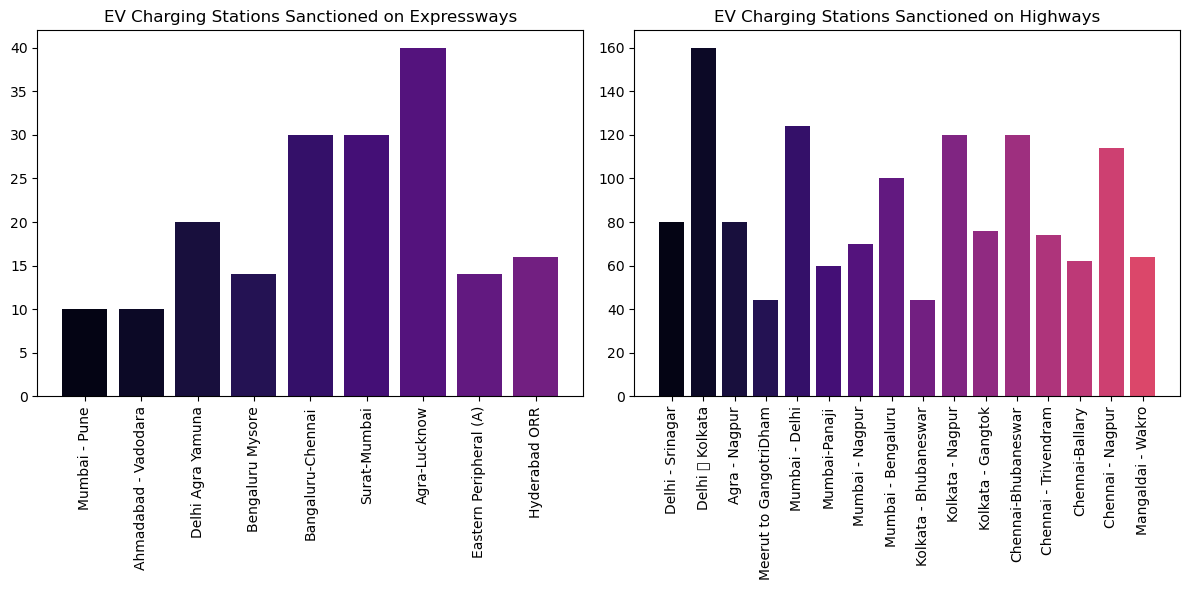

In [20]:
colors = sns.color_palette("magma", len(df))
# Visualization
expressways_data = df[df['Category'] == 'Expressways']
highways_data = df[df['Category'] == 'Highways']

# Specify a font that supports the required characters
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(expressways_data['Expressways/Highways'], expressways_data['EV Charging Stations Sanctioned'], color=colors)
plt.xticks(rotation=90)
plt.title('EV Charging Stations Sanctioned on Expressways')

plt.subplot(1, 2, 2)
plt.bar(highways_data['Expressways/Highways'], highways_data['EV Charging Stations Sanctioned'], color=colors)
plt.xticks(rotation=90)
plt.title('EV Charging Stations Sanctioned on Highways')

plt.tight_layout()
plt.show()

/var/folders/9j/5wlfmhp575qfg72zsmdt2q3c0000gn/T/ipykernel_1229/3577327038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


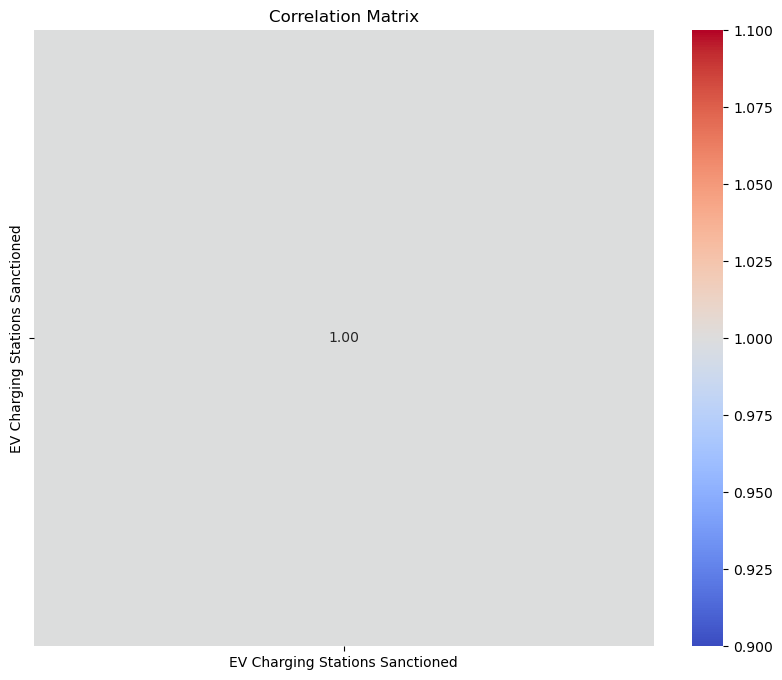

In [19]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Step 3: Clustering Algorithm
# Feature Selection and Scaling
X = df[['EV Charging Stations Sanctioned']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# K-Means Clustering
k = 3  # You can adjust the number of clusters as needed
n_init = 10  # Number of times the k-means algorithm will be run with different centroid seeds
kmeans = KMeans(n_clusters=k, random_state=0, n_init=n_init)
df['Cluster'] = kmeans.fit_predict(X_scaled)

/Users/hitteshkumarm/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


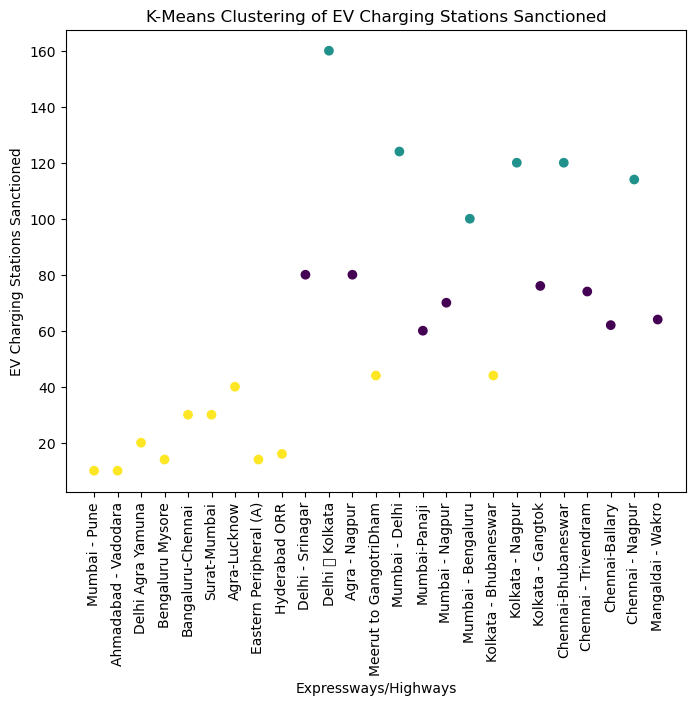

In [16]:
# Step 4: Visualization of Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Expressways/Highways'], df['EV Charging Stations Sanctioned'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Expressways/Highways')
plt.ylabel('EV Charging Stations Sanctioned')
plt.title('K-Means Clustering of EV Charging Stations Sanctioned')
plt.xticks(rotation=90)
plt.show()